<a href="https://colab.research.google.com/github/codemahek/n-set-cache/blob/master/PricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [65]:
df = web.DataReader("AAPL", data_source='yahoo', start='2012-01-01', end = '2021-03-16')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2021-03-10,122.169998,119.449997,121.690002,119.980003,111760400.0,119.980003
2021-03-11,123.209999,121.260002,122.540001,121.959999,102753600.0,121.959999
2021-03-12,121.169998,119.160004,120.400002,121.029999,87963400.0,121.029999


In [66]:
df.shape

(2315, 6)

Text(0, 0.5, 'Close Price USD ($)')

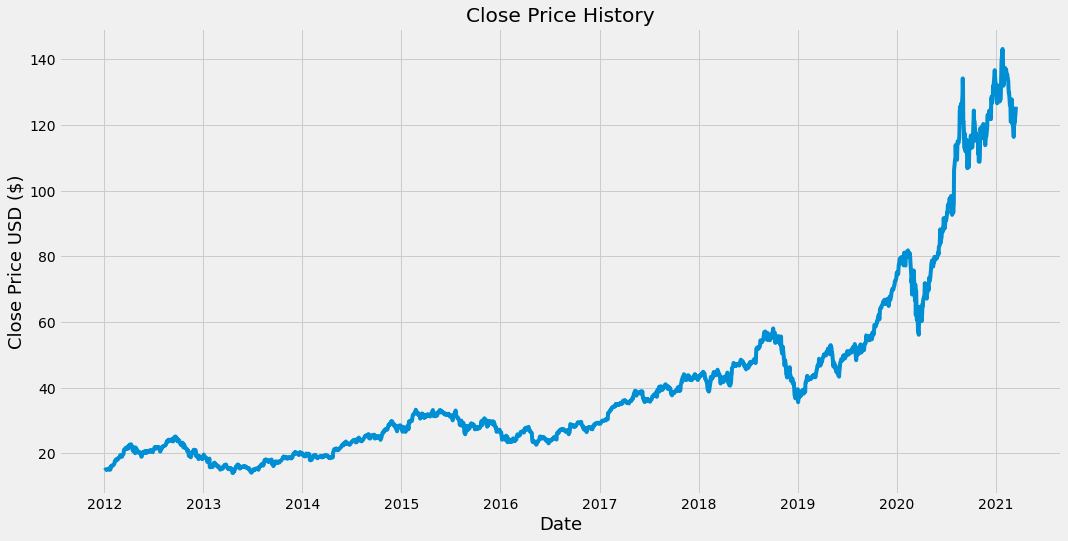

In [67]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

In [68]:
# Create a new dataframe with just close column
data = df.filter(['Close'])

#conver the dataframe to numpy array
dataset = data.values

#get the number of rows to train the data
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1852

In [69]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.82873171],
       [0.8516397 ],
       [0.86386763]])

In [70]:
#create the training dataset
#create the scaled training data set

train_data = scaled_data[0:training_data_len,:]

#split the data into x_train and y_train data sets

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00

In [71]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [72]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(1792, 60, 1)

In [73]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [74]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [75]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1792/1792 [==============================] - 43s 23ms/step - loss: 7.3809e-04


In [76]:
#create the testing dataset
#create the new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:,:]

#create the dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [77]:
#convert the data into numpy array
x_test = np.array(x_test)


In [78]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [79]:
#get the model predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [80]:
#get the root mean square error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse


3.2181651236944013

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


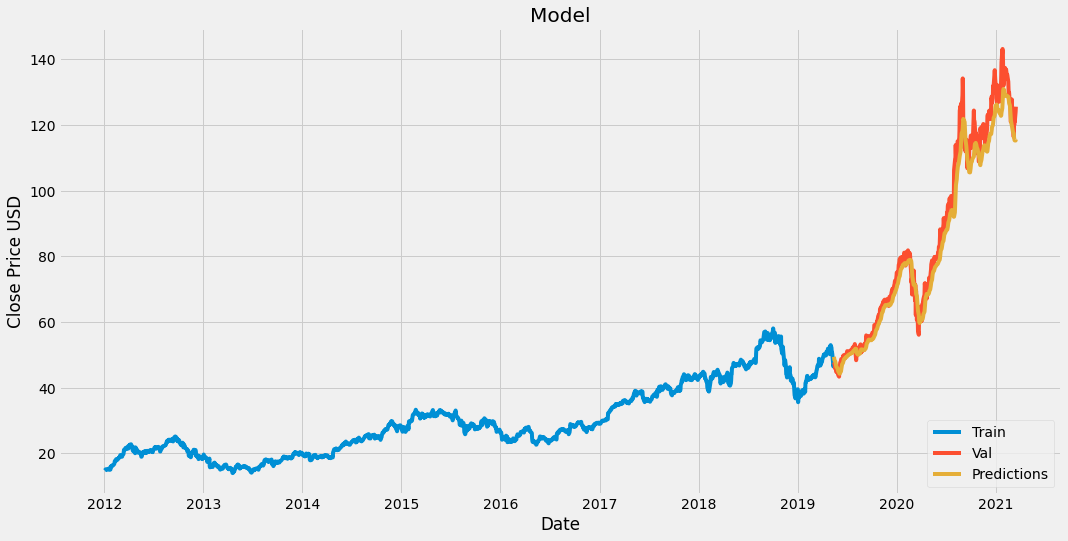

In [81]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]

valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [82]:
valid

,Close,Predictions
Date,,
2019-05-15,47.730000,49.368156
2019-05-16,47.520000,48.804874
2019-05-17,47.250000,48.341717
2019-05-20,45.772499,47.950619
2019-05-21,46.650002,47.479549
...,...,...
2021-03-10,119.980003,115.793472
2021-03-11,121.959999,115.365868
2021-03-12,121.029999,115.284103


In [90]:
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end = '2021-03-16')
new_df = apple_quote.filter(['Close'])

print(new_df[-60:])

last_60_days = new_df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

                 Close
Date                  
2020-12-17  128.699997
2020-12-18  126.660004
2020-12-21  128.229996
2020-12-22  131.880005
2020-12-23  130.960007
2020-12-24  131.970001
2020-12-28  136.690002
2020-12-29  134.869995
2020-12-30  133.720001
2020-12-31  132.690002
2021-01-04  129.410004
2021-01-05  131.009995
2021-01-06  126.599998
2021-01-07  130.919998
2021-01-08  132.050003
2021-01-11  128.979996
2021-01-12  128.800003
2021-01-13  130.889999
2021-01-14  128.910004
2021-01-15  127.139999
2021-01-19  127.830002
2021-01-20  132.029999
2021-01-21  136.869995
2021-01-22  139.070007
2021-01-25  142.919998
2021-01-26  143.160004
2021-01-27  142.059998
2021-01-28  137.089996
2021-01-29  131.960007
2021-02-01  134.139999
2021-02-02  134.990005
2021-02-03  133.940002
2021-02-04  137.389999
2021-02-05  136.759995
2021-02-08  136.910004
2021-02-09  136.009995
2021-02-10  135.389999
2021-02-11  135.130005
2021-02-12  135.369995
2021-02-16  133.190002
2021-02-17  130.839996
2021-02-18 

In [86]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-03-17', end = '2021-03-17')
apple_quote2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-17,125.860001,122.339996,124.050003,124.760002,111437500,124.760002
